In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Mall_Customers.csv")

In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

scaler = StandardScaler()
X = scaler.fit_transform(X)


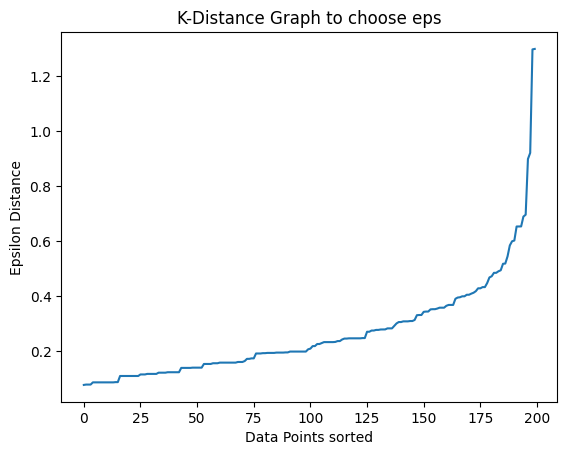

In [5]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:,4])

plt.plot(distances)
plt.title("K-Distance Graph to choose eps")
plt.xlabel("Data Points sorted")
plt.ylabel("Epsilon Distance")
plt.show()


In [6]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

df['Cluster'] = labels
print(df.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        0  
2        1  
3        0  
4        2  


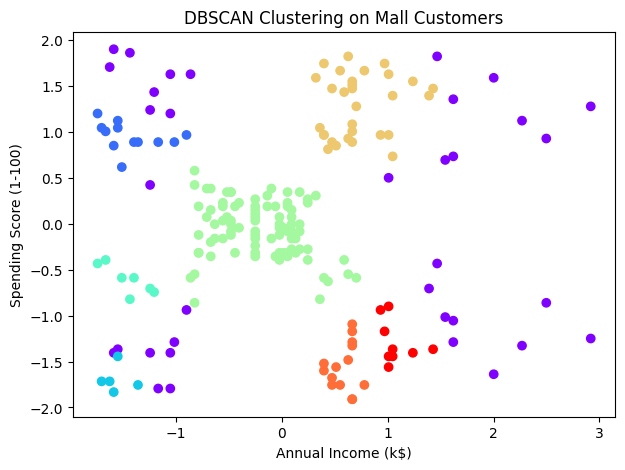

In [7]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering on Mall Customers')
plt.show()


In [8]:
noise = df[df['Cluster'] == -1]
print("Noise / Outliers:")
print(noise)


Noise / Outliers:
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
7             8  Female   23                  18                      94   
10           11    Male   67                  19                      14   
11           12  Female   35                  19                      99   
12           13  Female   58                  20                      15   
19           20  Female   35                  23                      98   
24           25  Female   54                  28                      14   
25           26    Male   29                  28                      82   
27           28    Male   35                  28                      61   
29           30  Female   23                  29                      87   
30           31    Male   60                  30                       4   
32           33    Male   53                  33                       4   
33           34    Male   18                  33                      

In [9]:
from sklearn.metrics import silhouette_score
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)


In [10]:
# Remove noise points (-1) before score
mask = labels != -1
if len(set(labels[mask])) > 1:
    score = silhouette_score(X[mask], labels[mask])
    print("Silhouette Score:", score)
else:
    print("Silhouette score not possible – only one cluster or all noise")


Silhouette Score: 0.5243276105881419


In [11]:
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

for eps in [0.2, 0.3, 0.4, 0.5]:

    print(f"\nEvaluating DBSCAN using eps={eps}")

    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)

    # Number of clusters (ignore noise -1)
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

    # Noise points
    n_noise = list(labels).count(-1)
    noise_ratio = n_noise / len(labels)

    print(f"Number of Clusters: {n_clusters}")
    print(f"Number of Noise Points: {n_noise} ({noise_ratio*100:.2f}%)")

    # ----- SILHOUETTE SCORE -----
    mask = labels != -1

    if n_clusters > 1:
        score = silhouette_score(X_scaled[mask], labels[mask])
        print(f"Silhouette Score: {score:.4f}")
    else:
        print("Silhouette Score: Not possible (only one cluster or all noise)")



Evaluating DBSCAN using eps=0.2
Number of Clusters: 7
Number of Noise Points: 77 (38.50%)
Silhouette Score: 0.5856

Evaluating DBSCAN using eps=0.3
Number of Clusters: 7
Number of Noise Points: 35 (17.50%)
Silhouette Score: 0.5243

Evaluating DBSCAN using eps=0.4
Number of Clusters: 4
Number of Noise Points: 15 (7.50%)
Silhouette Score: 0.4781

Evaluating DBSCAN using eps=0.5
Number of Clusters: 2
Number of Noise Points: 8 (4.00%)
Silhouette Score: 0.3876
